# Introduction
You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

1.   The ﬁrst page is the home page. When you come to the site for the ﬁrst time you can only land on the home page as a ﬁrst page.
2.   From the home page, the user can perform a search and land on the search page.
3. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.
4. If she does decide to buy, she ends up on the conﬁrmation page

The company CEO isn't very happy with the sales and, especially, sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Speciﬁcally, she is interested in :

* A full picture of funnel conversion rate for both desktop and mobile
* Some insights on what the product team should focus on in order to improve conversion rate
* Anything you might discover that could help improve conversion rate.


# Goal

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop oﬀ and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to **understand where/when our users abandon the website**. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

Enviroment Settings

In [1]:
# Print every output from a specific cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change to the current location (ref: https://webapps.stackexchange.com/questions/170886/copy-the-path-of-a-file-in-google-drive)
import os
os.chdir('/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset')
!pwd

/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset


# Data Loading and Data EDA
All the tables refer to only the user ﬁrst experience on the site.

* "user_table" - info about the user
* "home_page_table" - Users who landed on the home page
* "search_page_table" - Users who landed on the search_page
* "payment_page_table" - Users who landed on the payment_page
* "payment_confirmation_table" - Users who landed on the payment confirmation page. That is, these are the users who bought the product

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
user_data = pd.read_csv("user_table2.csv")
home_page_data = pd.read_csv("home_page_table.csv")
search_page_data = pd.read_csv("search_page_table.csv")
payment_page_data = pd.read_csv("payment_page_table.csv")
payment_conf_data = pd.read_csv("payment_confirmation_table.csv")

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


From the user table we can see that, there are three user attributes, namely, date, device, and sex, on which we can conduct funnel inference.

In [ ]:
home_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   page     90400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
home_page_data['page'].value_counts()

page
home_page    90400
Name: count, dtype: int64

In [ ]:
search_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  45200 non-null  int64 
 1   page     45200 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.4+ KB


In [ ]:
search_page_data['page'].value_counts()

page
search_page    45200
Name: count, dtype: int64

In [ ]:
payment_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6030 non-null   int64 
 1   page     6030 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [ ]:
payment_page_data['page'].value_counts()

page
payment_page    6030
Name: count, dtype: int64

In [ ]:
payment_conf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  452 non-null    int64 
 1   page     452 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
payment_conf_data['page'].value_counts()

page
payment_confirmation_page    452
Name: count, dtype: int64

For the rest of the table, the 'page' columns are all constant and doesn't contain valuable information.

## Create Training Data

Let's combine all the tables into one wide table for analysis.

In [6]:
data = pd.merge(pd.merge(pd.merge(pd.merge(user_data, home_page_data, on = 'user_id', how = 'left').rename(columns = {'page':'home_page'}),
                search_page_data, on = 'user_id', how = 'left').rename(columns = {'page':'search_page'}),
                payment_page_data, on = 'user_id', how = 'left').rename(columns = {'page':'payment_page'}),
                payment_conf_data, on = 'user_id', how = 'left').rename(columns = {'page':'payment_conf_page'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   home_page          90400 non-null  object
 5   search_page        45200 non-null  object
 6   payment_page       6030 non-null   object
 7   payment_conf_page  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 5.5+ MB


In [ ]:
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_conf_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


## Fill Missing Data

In [7]:
# Fill NA
data['home_page'] = np.where(data['home_page'].isna(), 0, 1)  # Note that the home_landings column will be constant 1
data['search_page'] = np.where(data['search_page'].isna(), 0, 1)
data['payment_page'] = np.where(data['payment_page'].isna(), 0, 1)
data['payment_conf_page'] = np.where(data['payment_conf_page'].isna(), 0, 1)

data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_conf_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


## Correct Data Types

In [8]:
data['date'] = pd.to_datetime(data['date']).dt.date

In [ ]:
data.describe()

,user_id,home_page,search_page,payment_page,payment_conf_page
count,90400.000000,90400.0,90400.000000,90400.000000,90400.000000
mean,498709.683473,1.0,0.500000,0.066704,0.005000
std,289040.674085,0.0,0.500003,0.249509,0.070534
min,17.000000,1.0,0.000000,0.000000,0.000000
25%,247978.750000,1.0,0.000000,0.000000,0.000000
50%,498267.000000,1.0,0.500000,0.000000,0.000000
75%,749789.250000,1.0,1.000000,0.000000,0.000000
max,999979.000000,1.0,1.000000,1.000000,1.000000


## Check Duplicated Data

In [9]:
data.duplicated().sum()

0

No duplicate exist.

# Funnel Analysis

### Correlation Analysis

In [ ]:
from scipy.stats import chi2_contingency

# Defining a function to perform the Chi-Square Test and interpret results
def cat_var_pairwise_relationship(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2], normalize = 'index')

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p = np.round(p,2)

    # Interpreting the result
    sign_ind = '' if p < 0.05 else 'NOT'  # 5% significance level

    print(f'The contingency table of {col1} and {col2} is:')
    print(contingency_table)
    print(f'The p value of Chisq independence test is: {p}. The test is {sign_ind} significant')
    print('\n')


In [ ]:
date_var = 'date'
cat_vars = list(data.loc[:, data.columns != date_var].select_dtypes(include = 'object').columns)
funnel_vars = list(data.columns[data.columns.str.contains('_page')])

cat_vars
funnel_vars

['device', 'sex']

['home_page', 'search_page', 'payment_page', 'payment_conf_page']

Let's first investigate the correlation between the two categorical variables: device and sex.

In [ ]:
data['device'].value_counts()

device
Desktop    60200
Mobile     30200
Name: count, dtype: int64

In [ ]:
data['sex'].value_counts()

sex
Male      45325
Female    45075
Name: count, dtype: int64

In [ ]:
cat_var_pairwise_relationship(data, 'device', 'sex')

The contingency table of device and sex is:
sex        Female      Male
device                     
Desktop  0.498289  0.501711
Mobile   0.499272  0.500728
The p value of Chisq independence test is: 1.0. The test is NOT significant




From both contingency table and the Chisq2 indenpence test, we can see that device and sex don't have a strong correlation.

Now, let's check the correlation between device, sex and the funnel variables.

In [ ]:
for x in cat_vars:
  for y in funnel_vars:
    cat_var_pairwise_relationship(data, x, y)


The contingency table of device and home_page is:
home_page    1
device        
Desktop    1.0
Mobile     1.0
The p value of Chisq independence test is: 1.0. The test is NOT significant


The contingency table of device and search_page is:
search_page    0    1
device               
Desktop      0.5  0.5
Mobile       0.5  0.5
The p value of Chisq independence test is: 1.0. The test is NOT significant


The contingency table of device and payment_page is:
payment_page     0     1
device                  
Desktop       0.95  0.05
Mobile        0.90  0.10
The p value of Chisq independence test is: 1.0. The test is NOT significant


The contingency table of device and payment_conf_page is:
payment_conf_page         0         1
device                               
Desktop            0.997508  0.002492
Mobile             0.990000  0.010000
The p value of Chisq independence test is: 1.0. The test is NOT significant


The contingency table of sex and home_page is:
home_page    1
sex          

We can see that all the Chisq tests are insignificant, meaning that neither of device nor sex has statistically significant correlation with the funnel conversion rate.

But we can still conduct visualizations to present the difference in funnel conversion rates among users cohorts.

### Overall Funnel Analysis

In [ ]:
conv_rates = data[funnel_vars].mean()
conv_rates = conv_rates.reset_index()
conv_rates.columns = ['stage', 'conv_rate']
conv_rates['conv_rate'] *= 100
conv_rates

,stage,conv_rate
0,home_page,100.000000
1,search_page,50.000000
2,payment_page,6.670354
3,payment_conf_page,0.500000


[Text(0, 0, '100.0%'),
 Text(0, 0, '50.0%'),
 Text(0, 0, '6.67%'),
 Text(0, 0, '0.5%')]

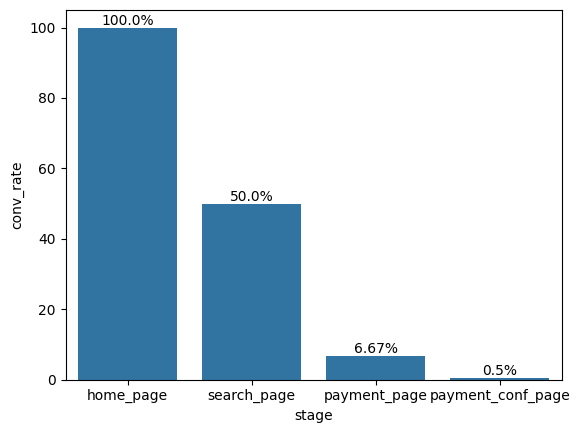

In [ ]:
ax = sns.barplot(x = 'stage', y ='conv_rate', data = conv_rates)
ax.bar_label(ax.containers[0], labels = [str(x)+'%' for x in list(np.round(conv_rates['conv_rate'],2))])
plt.show()

As we can see, 50% of the users land on the search page, 6.67% of the users land on the payment page and 0.5% of the uses land on the payment confirmation page. So, the overall conversion rate is 0.5%.

In [ ]:
condi_conv_rates = conv_rates.copy()
condi_conv_rates.loc[condi_conv_rates['stage'] == 'payment_page', 'conv_rate'] = data[data['payment_page'] == 1].shape[0]/data[data['search_page'] == 1].shape[0]*100
condi_conv_rates.loc[condi_conv_rates['stage'] == 'payment_conf_page', 'conv_rate'] = data[data['payment_conf_page'] == 1].shape[0]/data[data['payment_page'] == 1].shape[0]*100
condi_conv_rates.rename(columns = {'conv_rate': 'condi_conv_rate'}, inplace = True)
condi_conv_rates

,stage,condi_conv_rate
0,home_page,100.000000
1,search_page,50.000000
2,payment_page,13.340708
3,payment_conf_page,7.495854


[Text(0, 0, '100.0%'),
 Text(0, 0, '50.0%'),
 Text(0, 0, '13.34%'),
 Text(0, 0, '7.5%')]

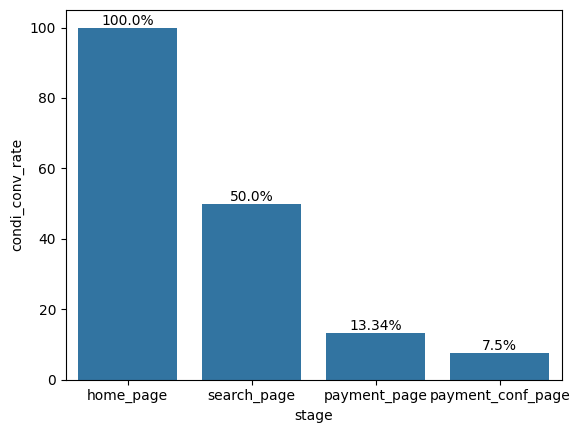

In [ ]:
ax = sns.barplot(x = 'stage', y ='condi_conv_rate', data = condi_conv_rates)
ax.bar_label(ax.containers[0], labels = [str(x)+'%' for x in list(np.round(condi_conv_rates['condi_conv_rate'],2))])
plt.show()

As for the conditional conversion rate,
* Among the users landed on the home page, 50% of them landed on the search page
* Among the users landed on the search page, 12.34% of them landed on the payment page
* Among the useres landed on the payment page, 7.5% of them landed on the payment confirmation page.

## Funnel Analysis by User Cohorts

In [ ]:
cohort_conv_rates = data.groupby(cat_vars)[funnel_vars].mean()
cohort_conv_rates = cohort_conv_rates.reset_index()
cohort_conv_rates['cohort'] = cohort_conv_rates['device'] + '_' + cohort_conv_rates['sex']
cohort_conv_rates.drop(cat_vars, axis = 1, inplace = True)

In [ ]:
cohort_conv_rates

,home_page,search_page,payment_page,payment_conf_page,cohort
0,1.0,0.503084,0.051005,0.002467,Desktop_Female
1,1.0,0.496937,0.049002,0.002516,Desktop_Male
2,1.0,0.503051,0.104125,0.011076,Mobile_Female
3,1.0,0.496958,0.095887,0.008927,Mobile_Male


Text(0.5, 1.0, 'Funnel Conversion Rate of Desktop_Female')

[Text(0, 0, '100.0%'),
 Text(0, 0, '50.31%'),
 Text(0, 0, '5.1%'),
 Text(0, 0, '0.25%')]

Text(0.5, 1.0, 'Funnel Conversion Rate of Desktop_Male')

[Text(0, 0, '100.0%'),
 Text(0, 0, '49.69%'),
 Text(0, 0, '4.9%'),
 Text(0, 0, '0.25%')]

Text(0.5, 1.0, 'Funnel Conversion Rate of Mobile_Female')

[Text(0, 0, '100.0%'),
 Text(0, 0, '50.31%'),
 Text(0, 0, '10.41%'),
 Text(0, 0, '1.11%')]

Text(0.5, 1.0, 'Funnel Conversion Rate of Mobile_Male')

[Text(0, 0, '100.0%'),
 Text(0, 0, '49.7%'),
 Text(0, 0, '9.59%'),
 Text(0, 0, '0.89%')]

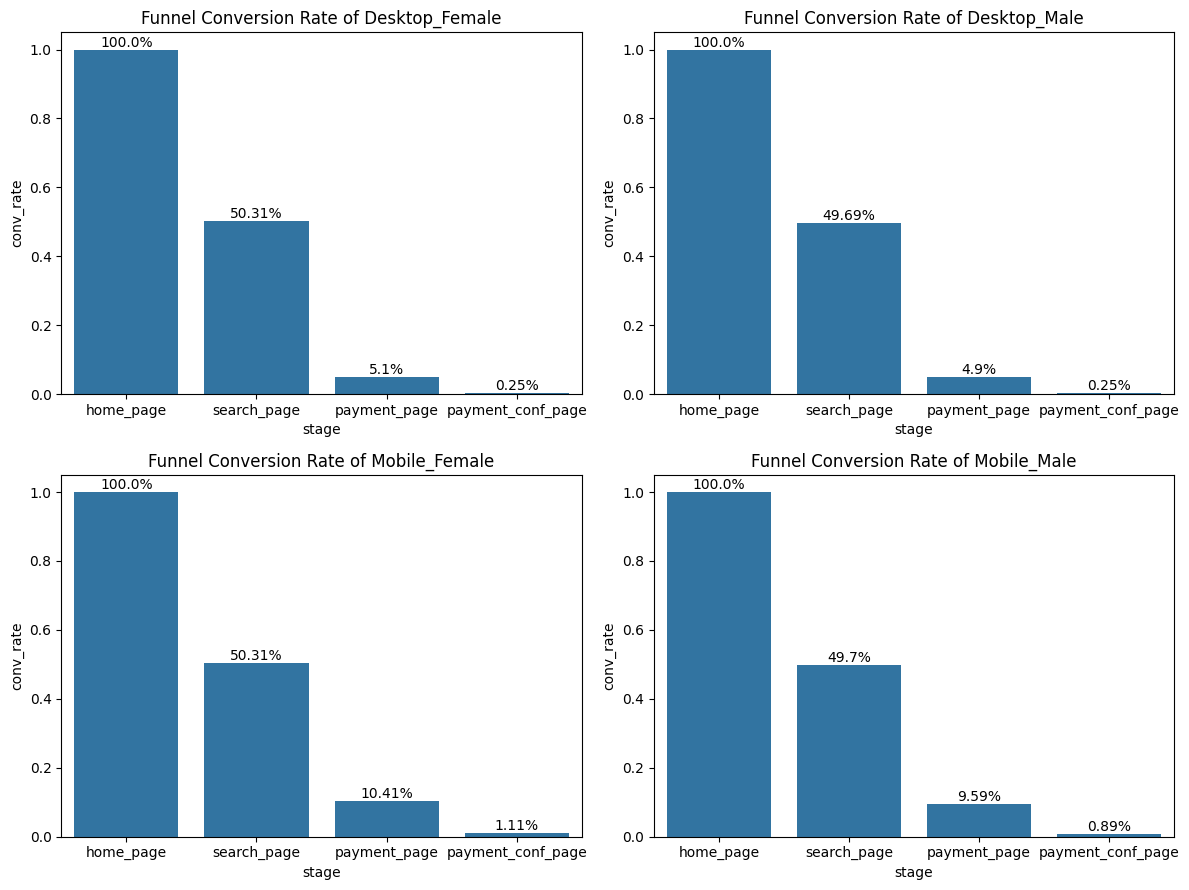

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,9))
for i, ax in zip(range(4), axs.flat):
    tmp = cohort_conv_rates.iloc[i:i+1,:4].transpose().reset_index()
    tmp.columns = ['stage', 'conv_rate']
    a = sns.barplot(x = 'stage', y = 'conv_rate', data = tmp, ax = ax)
    title = cohort_conv_rates['cohort'][i]
    a.set_title(f'Funnel Conversion Rate of {title}')
    a.bar_label(a.containers[0], labels = [str(x)+'%' for x in list(np.round(tmp['conv_rate']*100,2))])
    fig.tight_layout()

Based on the funnel conversion rates by users cohorts above, we can see that
* The mobile users tend to have higher (twice, 5% v.s. 10%) conversion rate from search page to payment page and higher (twice, 1%/10% v.s. 0.25%/5%) conversion rate from payment page to payment confirmation page.
* The female and male users behave quite similarily across funnels and across device. Thus, for the following analysis, we will combine different user sexes.


## Time Series Analysis

In [ ]:
data['date'].value_counts().sort_index()  # sort by date

date
2015-01-01    712
2015-01-02    721
2015-01-03    760
2015-01-04    713
2015-01-05    754
             ... 
2015-04-26    792
2015-04-27    779
2015-04-28    736
2015-04-29    713
2015-04-30    801
Name: count, Length: 120, dtype: int64

In [ ]:
data['date'].value_counts() # sort by frequency

date
2015-02-08    877
2015-02-07    846
2015-02-02    845
2015-02-15    835
2015-02-25    830
             ... 
2015-01-13    693
2015-03-27    693
2015-01-26    686
2015-03-19    684
2015-01-18    668
Name: count, Length: 120, dtype: int64

We can see that our data contains 4 months of data points, with frequencies evenly distributed.

In [ ]:
data['date'].value_counts().shape

(120,)

In [ ]:
pd.to_datetime('2015-04-30') - pd.to_datetime('2015-01-01')

Timedelta('119 days 00:00:00')

if we count the min and max dates, there are 120 days inbetween, which equals to the total number of dates in the data. Thus, there is no missing dates.

In [ ]:
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_conf_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [ ]:
cvr_ts = data.groupby(['date','device'])[funnel_vars].mean().reset_index()
cvr_ts

,date,device,home_page,search_page,payment_page,payment_conf_page
0,2015-01-01,Desktop,1.0,0.519270,0.095335,0.002028
1,2015-01-01,Mobile,1.0,0.821918,0.132420,0.022831
2,2015-01-02,Desktop,1.0,0.539256,0.090909,0.002066
3,2015-01-02,Mobile,1.0,0.784810,0.168776,0.016878
4,2015-01-03,Desktop,1.0,0.437870,0.043393,0.005917
...,...,...,...,...,...,...
235,2015-04-28,Mobile,1.0,0.207692,0.061538,0.003846
236,2015-04-29,Desktop,1.0,0.483444,0.008830,0.000000
237,2015-04-29,Mobile,1.0,0.200000,0.023077,0.000000
238,2015-04-30,Desktop,1.0,0.509294,0.018587,0.000000


<Axes: xlabel='date', ylabel='search_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

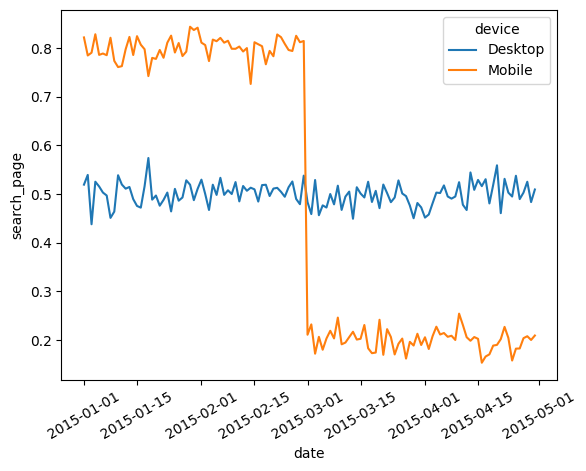

In [ ]:
sns.lineplot(data = cvr_ts, x = 'date', y = 'search_page', hue = 'device')
plt.xticks(rotation=30)
plt.show()

We can see that there is a sharp drop in search page conversion rate in the mobile users only. The conversion rate dropped from 80% to 20%. The desktop users' search page conversion rate stays at 50%. Let's dive into mobile users to see if this is a consistent behavior for female and male users.

In [ ]:
cohort_conv_rates_ts = data.groupby(cat_vars+ [date_var])[funnel_vars].mean()
cohort_conv_rates_ts = cohort_conv_rates_ts.reset_index()
cohort_conv_rates_ts['cohort'] = cohort_conv_rates_ts['device'] + '_' + cohort_conv_rates_ts['sex']
cohort_conv_rates_ts.drop(cat_vars, axis = 1, inplace = True)

In [ ]:
cohort_conv_rates_ts.tail()

,date,home_page,search_page,payment_page,payment_conf_page,cohort
475,2015-04-26,1.0,0.179104,0.037313,0.00000,Mobile_Male
476,2015-04-27,1.0,0.207692,0.084615,0.00000,Mobile_Male
477,2015-04-28,1.0,0.203008,0.052632,0.00000,Mobile_Male
478,2015-04-29,1.0,0.228814,0.025424,0.00000,Mobile_Male
479,2015-04-30,1.0,0.195122,0.040650,0.00813,Mobile_Male


<Axes: xlabel='date', ylabel='search_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

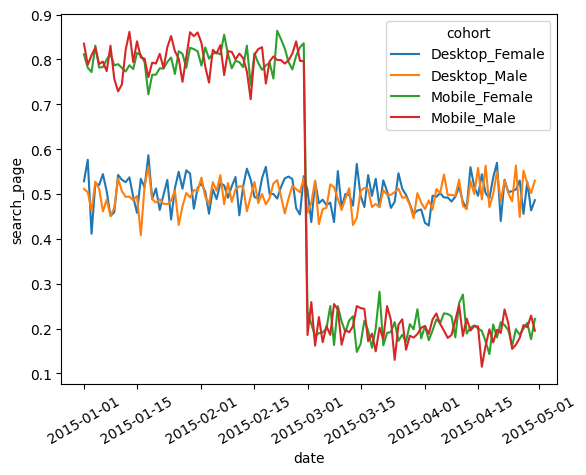

In [ ]:
sns.lineplot(data = cohort_conv_rates_ts, x = 'date', y = 'search_page', hue = 'cohort')
plt.xticks(rotation=30)
plt.show()

This is a consistent behavior for female and male users. This might due to a mobile app bug or design change happened on 03/01/2015.

<Axes: xlabel='date', ylabel='payment_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

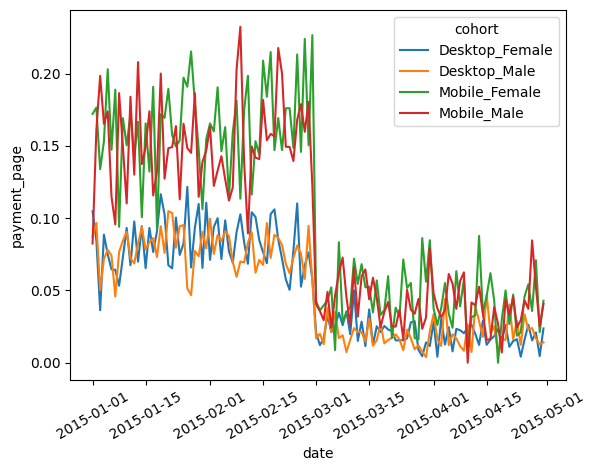

In [ ]:
sns.lineplot(data = cohort_conv_rates_ts, x = 'date', y = 'payment_page', hue = 'cohort')
plt.xticks(rotation=30)
plt.show()

There is still no substantial difference in user gender. Thus, let combine the user gender to get a more concise graph.

<Axes: xlabel='date', ylabel='payment_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

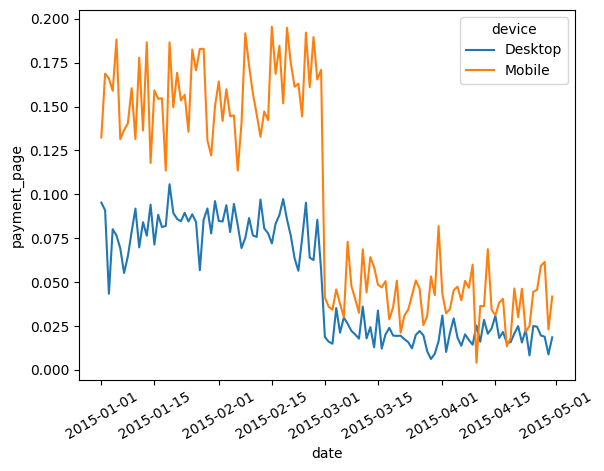

In [ ]:
sns.lineplot(data = cvr_ts, x = 'date', y = 'payment_page', hue = 'device')
plt.xticks(rotation=30)
plt.show()

The payment page conversion rate experienced a sharp drop in both mobile and desktop user groups on 03/01/2015. The mobile users are more strongly impacted.

<Axes: xlabel='date', ylabel='payment_conf_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

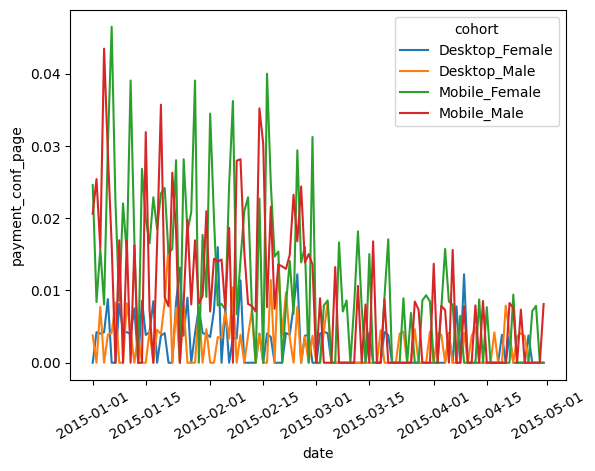

In [ ]:
sns.lineplot(data = cohort_conv_rates_ts, x = 'date', y = 'payment_conf_page', hue = 'cohort')
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='date', ylabel='payment_conf_page'>

(array([16436., 16450., 16467., 16481., 16495., 16509., 16526., 16540.,
        16556.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16450.0, 0, '2015-01-15'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16481.0, 0, '2015-02-15'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16509.0, 0, '2015-03-15'),
  Text(16526.0, 0, '2015-04-01'),
  Text(16540.0, 0, '2015-04-15'),
  Text(16556.0, 0, '2015-05-01')])

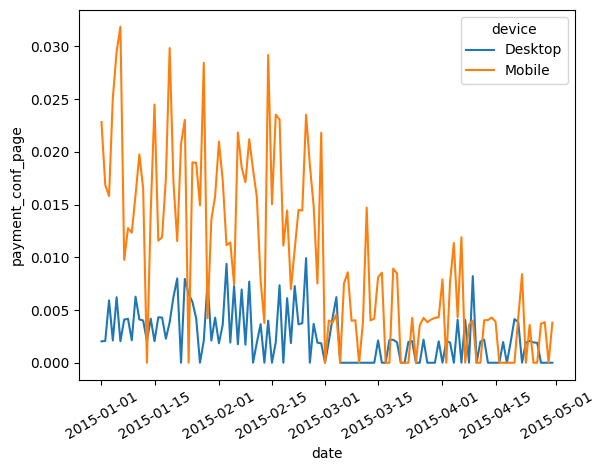

In [ ]:
sns.lineplot(data = cvr_ts, x = 'date', y = 'payment_conf_page', hue = 'device')
plt.xticks(rotation=30)
plt.show()

For the payment confirmation page conversion rate, the 03/01/2015 event impacted the mobile users more. The mobile users' conversion rate dropped from 1.5% to 0.5%

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.query("date < '2015-03-01'").groupby('device')[funnel_vars].mean()

,home_page,search_page,payment_page,payment_conf_page
device,,,,
Desktop,1.0,0.503688,0.080133,0.003787
Mobile,1.0,0.800000,0.158278,0.016424


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.query("date > '2015-03-01'").groupby('device')[funnel_vars].mean()

,home_page,search_page,payment_page,payment_conf_page
device,,,,
Desktop,1.0,0.496523,0.019885,0.001215
Mobile,1.0,0.199825,0.041728,0.003634


If we only look at our conversion rate before '2015-03-01', the desktop and mobile users conversion rates are 0.38% and 1.64%, respectively. While, after '2015-03-01', the corresponding conversion dropped to 0.12% and 0.36%, respectively.

# Findings and Insights

Based on our funnel analysis, we have the following findings
* The conversion behavior across funnel doesn't differ by user gender. Thus, there is no need to treat female and male users differently.
* Overall, the mobile users have higher conversion rate starting from the beginning (the search page). We can compare the desktop and mobile app designs to identify the areas where the website can be impoved.
* There is a significantly drop in conversion rate on 03/01/2015 and the drop never recovered.
 * It impacted the mobile users starting from the search page, and impacted the desktop users starting from the payment page.
 * We should investigate what happened on this day and afterward. The drop could be due to a systematic bug, the launch of a less effective design, or a new product from one of our competitors.
 * If we could recover from it, our conversion rate can increase from 0.12% to 0.38% for desktop users, and from 0.36% to 1.64% for mobile users.

# Future Work
Based on the data EDA. We can conduct the funnel analysis in two ways
* We conducted funnel analysis based on data EDA and visualizaiton from various dimensions of the data. One future work can be to build ML models to predict funnel conversion rates given time, device, and sex. Then identify important features contribute to the conversion rate at each stage.